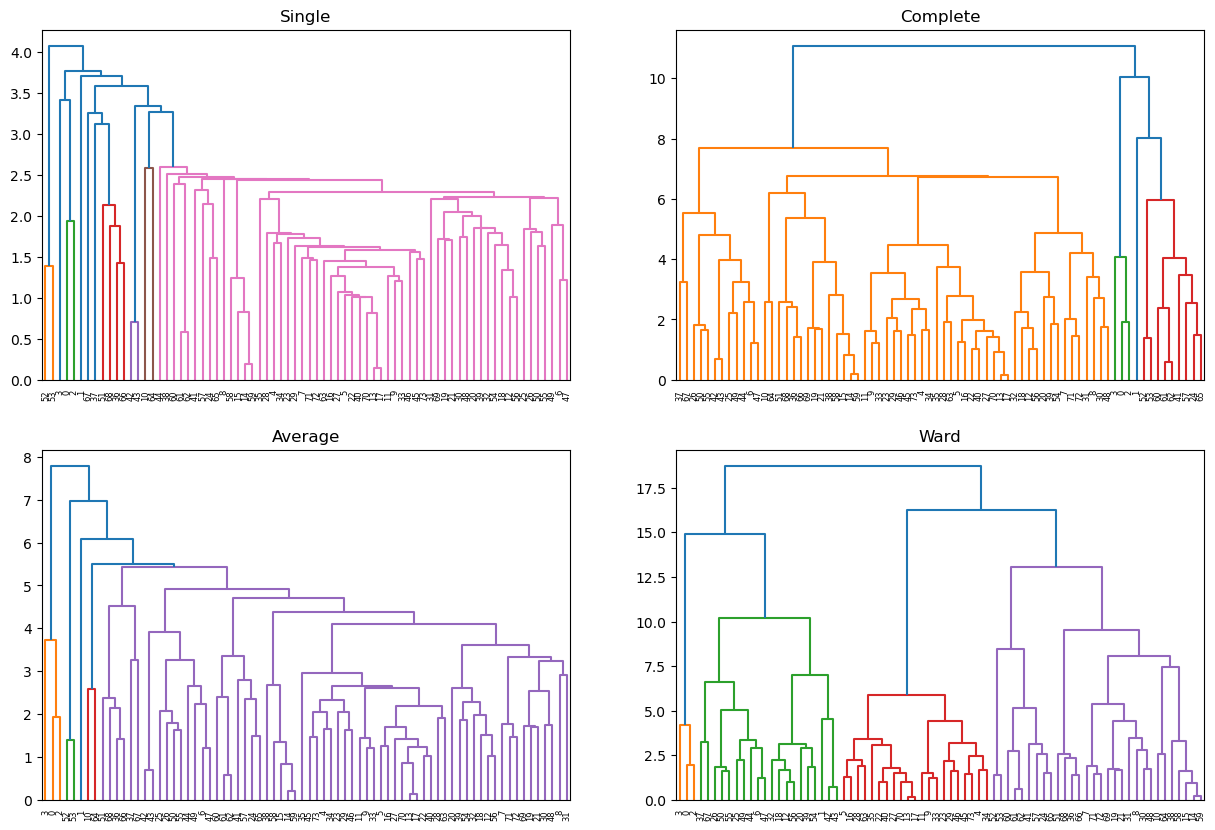

Ward is the best method because the tree is balanced well and it clearly separates the data into clusters.


In [57]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

data = pd.read_csv("cereals.csv")
data = data.dropna(axis=0)

numericData = data.select_dtypes(include=[np.number])

scaler = StandardScaler()
xNorm = scaler.fit_transform(numericData)

single = linkage(xNorm, method='single')
complete = linkage(xNorm, method='complete')
average = linkage(xNorm, method='average')
ward = linkage(xNorm, method='ward')

plt.figure(figsize=(15, 10))
plt.subplot(221)
dendrogram(single)
plt.title("Single")

plt.subplot(222)
dendrogram(complete)
plt.title("Complete")

plt.subplot(223)
dendrogram(average)
plt.title("Average")

plt.subplot(224)
dendrogram(ward)
plt.title("Ward")

plt.show()
print("Ward is the best method because the tree is balanced well and it clearly separates the data into clusters.")

I would choose k = 5 as the optimal number of clusters based on the dendrogram.


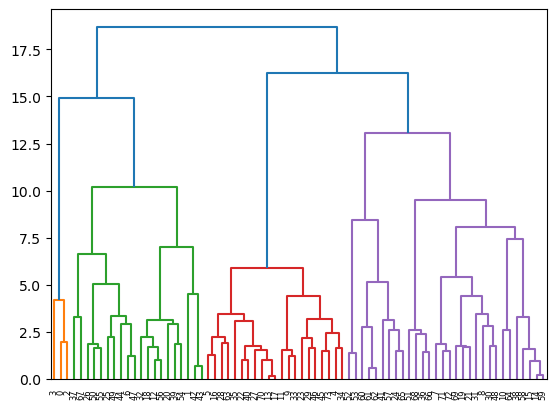

In [58]:
# number of clusters
nClusters = len(set((dendrogram(ward)['color_list']))) 
print(f"I would choose k = {nClusters} as the optimal number of clusters based on the dendrogram.")

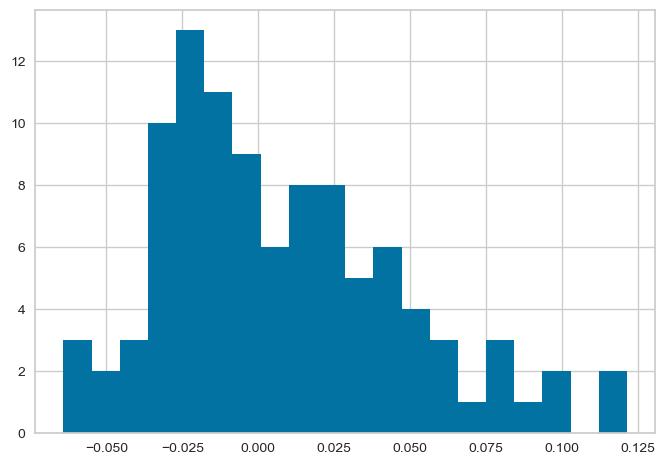

The analysis teqhnique I used to evaluate the structure of the clusters is the adjusted rand index.

Adjusted rand index measures the similarity between two clusters.

Through randomized data partition using 100 iterations, the average ARI score was 0.007

The adjusted rand index ranges from -1 to 1.  The current value after analysis suggests the cluster similarity is weak.



In [98]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(13)
partition = xNorm
np.random.shuffle(partition)

ariScores = []

for i in range(100):
    np.random.shuffle(partition)
    partA, partB = np.split(partition, 2)
    
    clusterA = AgglomerativeClustering(n_clusters=nClusters, linkage='ward')
    labelsA = clusterA.fit_predict(partA)
    labelsB = clusterA.fit_predict(partB)
    
    ariScores.append(adjusted_rand_score(labelsA, labelsB))

plt.hist(ariScores, bins=20)
plt.show()

print("The analysis teqhnique I used to evaluate the structure of the clusters is the adjusted rand index.\n")
print("Adjusted rand index measures the similarity between two clusters.\n")
print(f"Through randomized data partition using 100 iterations, the average ARI score was {round(np.mean(ariScores), 3)}\n")
print("The adjusted rand index ranges from -1 to 1.  The current value after analysis suggests the cluster similarity is weak.\n")

In [100]:
print("To find a cluster of healthy cereal, the first step should be defining the requirements needed in order for cereal to be \nconsidered healthy.\n")
print("Once requirements are established, there would likely be specific labels that would be used to cluster the cereals together.\n")
print("For example, if sugar, fat, vitamins, and calories were the most predictive labels, cluster analysis should place more \nimportance on these variables.\n")
print("Normalizing the dataset should be done as clusters are formed based on distance and outliers could drastically impact \nthe cluster distribution.\n")
print("The most important part of this task is to provide a good definition of what healthy cereal looks like.  Solving a problem is \nmuch easier when the goal is clearly defined.")

To find a cluster of healthy cereal, the first step should be defining the requirements needed in order for cereal to be 
considered healthy.

Once requirements are established, there would likely be specific labels that would be used to cluster the cereals together.

For example, if sugar, fat, vitamins, and calories were the most predictive labels, cluster analysis should place more 
importance on these variables.

Normalizing the dataset should be done as clusters are formed based on distance and outliers could drastically impact 
the cluster distribution.

The most important part of this task is to provide a good definition of what healthy cereal looks like.  Solving a problem is 
much easier when the goal is clearly defined.
